# LBA ML Assignment

For this LBA, I took 94 photos of medialunas on a plate in Minerva's Buenos Aires Residence in Palermo, inspired by local breakfast culture. The assignment is motivated by the rich flavors of argentinian desayuno (breakfast) with an empphasis on facturas (pastries) that locals consume in the morning. Medialuneas are primarily known for their similrity to french croissaints. The pictures are taken in the residence's grill area, where students often study during the day. I hoped to capture the change of the sky, lighting, and shades over 5 hours (from 2.00 - 7.30) of filmign a time lapse. Overall, the pictures are relatively diverse and show some variance.

## Core Assignment

1. Below I processed all photos down to a size not exceeding 512 pixels in either width or height.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Total Images: 94
Images Shape: (94, 187500)


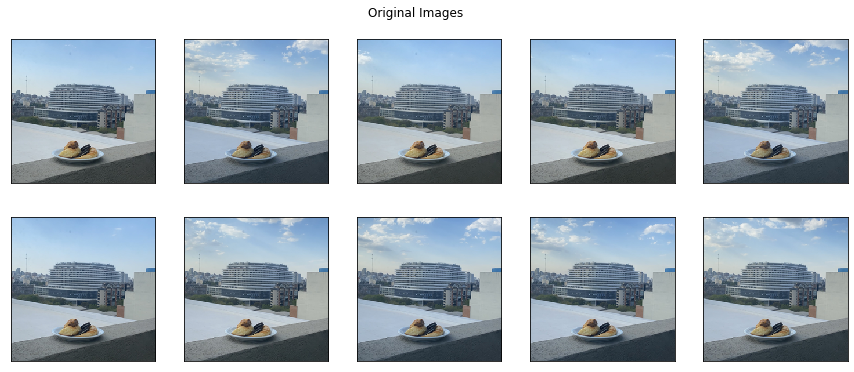

In [126]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# resize and crop images
def resize_images(images):
    '''
    Resizes and crops images using the function given
    '''    
    flattened = []
    # for each image path
    for path in images:
        # open it as a read file in binary mode
        with open(path, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                cover = resizeimage.resize_cover(image, [250,250])
                # flatten the matrix to an array and append it to all flattened images
                flattened.append((np.array(cover).flatten(), 0))

    # Flatten it once more
    flattened = np.asarray(flattened)
    # Declare which are the X and Y inputs
    X = flattened[:,0]
    Y = flattened[:,1]

    # Use np.stack to put the data into the right dimension
    X = np.stack(i for i in X)
    Y = np.stack(i for i in Y)
    
    # return resized images
    return X, Y

file = glob("/Users/Dilnaz/Downloads/LBA/dataset/*")

# resize images using function
images = resize_images(file)[0]

print(f'Total Images: {len(images)}')
print(f'Images Shape: {images.shape}')

# plot samples of original images
fig = plt.figure(figsize=(15, 6)) 

for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    img = Image.fromarray(images[i].reshape(250,250,3), 'RGB') 
    ax.imshow(img, interpolation='nearest') 
    
plt.suptitle('Original Images', y=0.95)

plt.show()

During most of the day, the sky did not change much, with few clouds changing only. Closer to sunset, there were variations. 

2. Using principal components analysis (PCA), I projected these images to a 2-dimensional representation. I reduced dimensions and plotted how the explained variance changes with the number of components. Overall, the graph shows that under ten components/dimensions are needed to explain 95% of the variance. 

(94, 94)


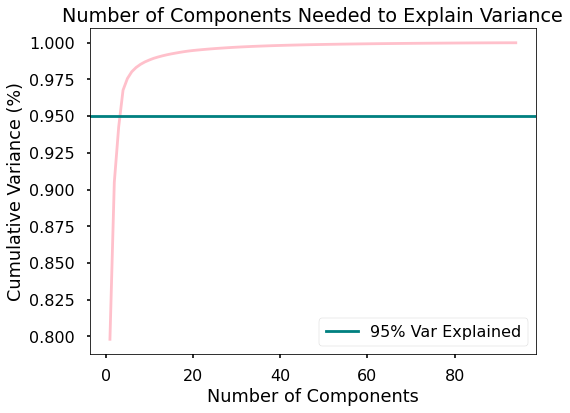

In [89]:
from sklearn import decomposition
# apply PCA using all components
n_components = len(images) #dimensions
pca = decomposition.PCA(n_components=n_components) #decomposes by n_components variables

# fit images to PCA to reduce dimensions
transformed = pca.fit_transform(images)

print(transformed.shape)
# plot number of components vs. explained variance
plt.figure(figsize=(8,6))

components = np.arange(1, n_components+1, step=1)
var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(components, var, color='pink')
plt.axhline(y=0.95, color='teal', label='95% Var Explained')

plt.title('Number of Components Needed to Explain Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')

plt.legend(loc=4)
plt.show()

The number of components needed to reach a high variance of 95% is relative low. It might be because the dataset is extensive but not too diverse. 

3. After applying PCA, I visually inspected the 2D locations of each photo in the new space and showed the reconstruction from each low-dimensional representation. 

In [135]:
# calculate PCA results and save image for each dimension

samples = []
expl_var = []
dims = []
originals = []

for i in range(1,len(images)+1,1):
    
    # apply PCA
    pca = decomposition.PCA(n_components=i)

    # fit images to PCA to reduce dimensions
    transformed = pca.fit_transform(images)
    
    # transform image to save samples
    inverse = pca.inverse_transform(transformed)
    formatted = np.clip(inverse, 0, 255).astype(np.uint8)
    
    # save one random sample from each dimension
    random_row = np.random.randint(len(images), size=1)
    sample = formatted[random_row]
    original = images[random_row]
    
    # calculate explained variance
    pca_var_expl = \
    np.round(np.cumsum(pca.explained_variance_ratio_)[-1],2)
    
    # save results
    samples.append(sample) 
    originals.append(original)
    
    expl_var.append(pca_var_expl)
    dims.append(i)
    
    # plot sample from each dimension

# reshape formatted samples
reshaped = []

for i in samples:
    new_img = Image.fromarray(i.reshape(250,250,3), 'RGB')
    reshaped.append(new_img)


In [206]:
reshaped2 = []

for i in originals:
    new_img = Image.fromarray(i.reshape(250,250,3), 'RGB')
    reshaped2.append(new_img)

Finally, I need to plot these reconstructed images with their original pictures using two arrays I have created: reshaped2 and reshaped 1. 

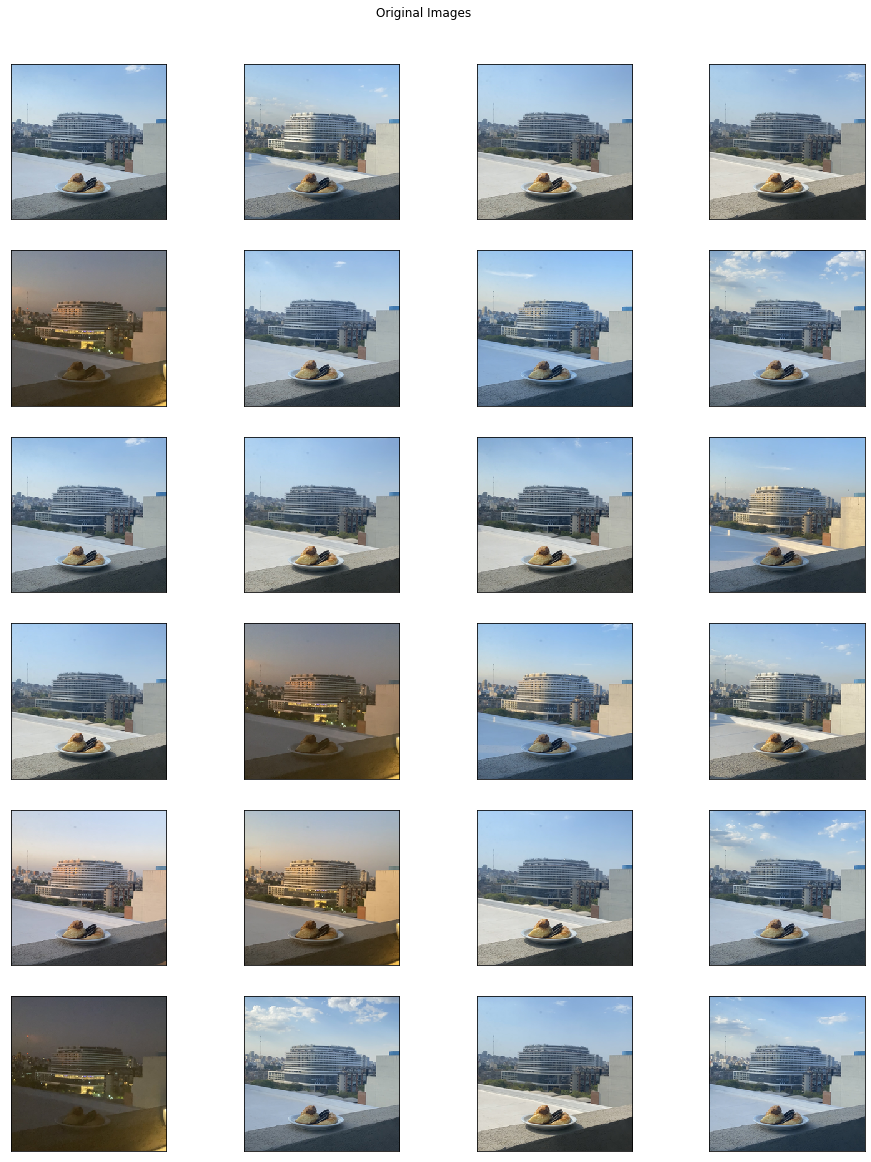

In [209]:
# plot first 24 pictures of original pictures in ascending order of the estimated variance
fig = plt.figure(figsize=(16, 20)) 

for i in range(24): 
    ax = fig.add_subplot(6, 4, i+1, xticks=[], yticks=[]) 
    ax.imshow(reshaped2[i], interpolation='nearest')
    
plt.suptitle('Original Images', y=0.92)
plt.show()

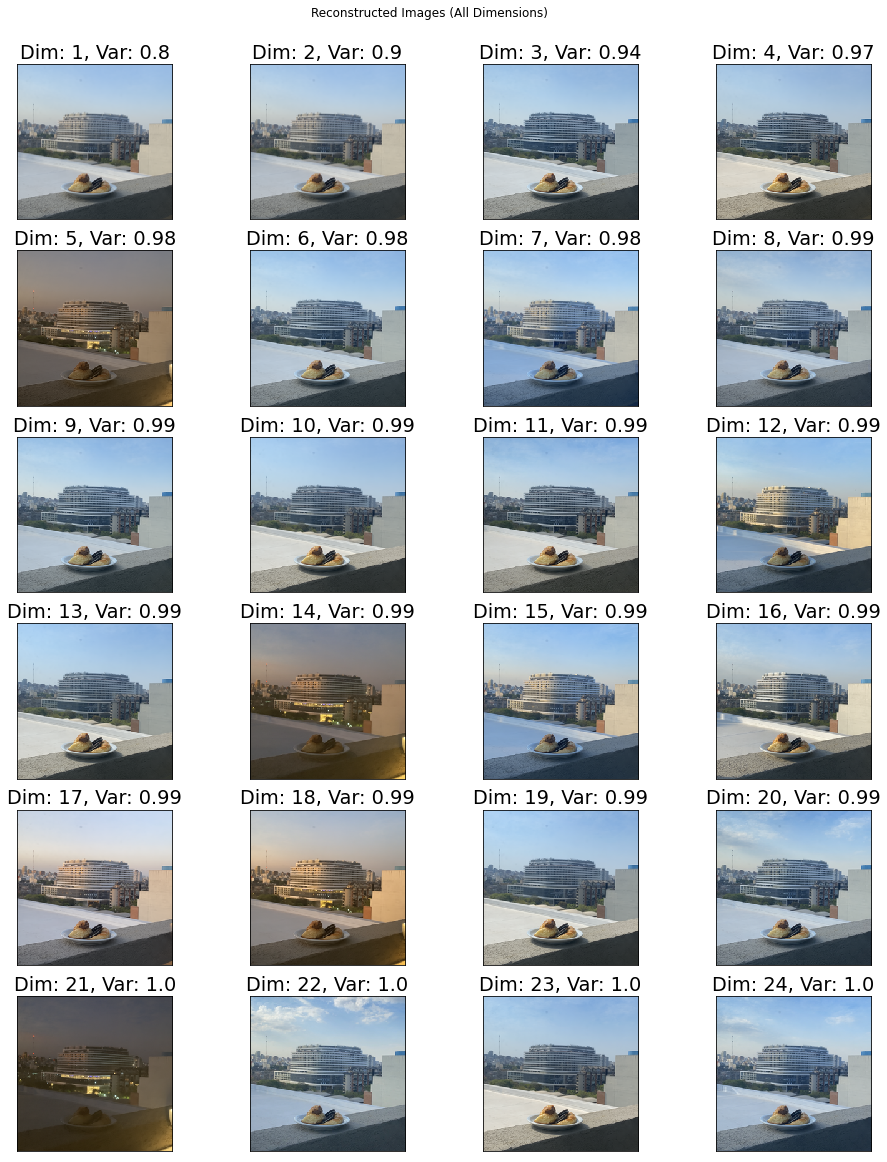

In [210]:
# plot 24 pictures of Reconstructed images in ascedning order of dimensions
fig = plt.figure(figsize=(16, 20)) 

for i in range(24): 
    ax = fig.add_subplot(6, 4, i+1, xticks=[], yticks=[]) 
    ax.imshow(reshaped[i], interpolation='nearest')
    ax.set_title(f'Dim: {dims[i]}, Var: {expl_var[i]}')
    
plt.suptitle('Reconstructed Images (All Dimensions)', y=0.92)
plt.show()

Here is the scatterplot of all images in the 2D space and where a new point is:

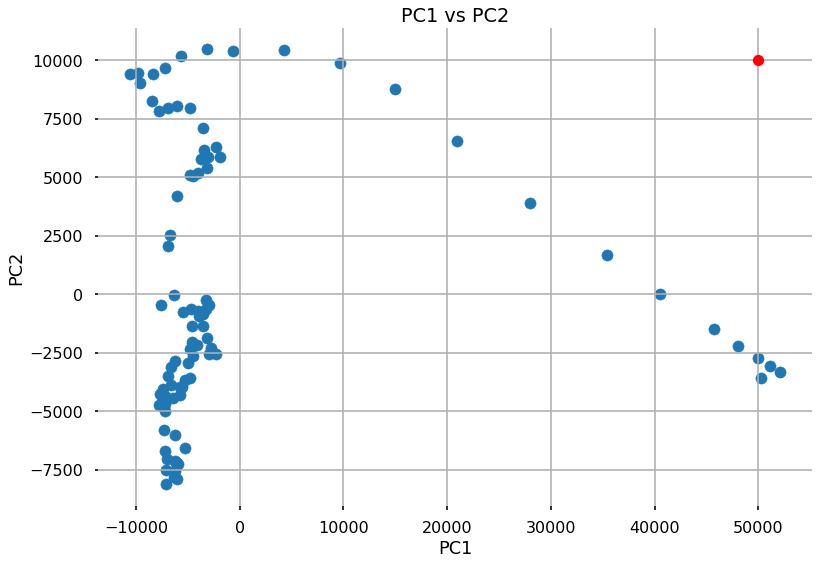

In [266]:
# drawing first two components
pca = decomposition.PCA(n_components=2)
transformed = pca.fit_transform(images)
   
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(transformed[:,0],transformed[:,1])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_frame_on(False)
ax1.grid(True)
ax1.set_title('PC1 vs PC2')

# red point that is far from the plot
plt.plot(50000,10000,marker="o", color="red")
plt.show()

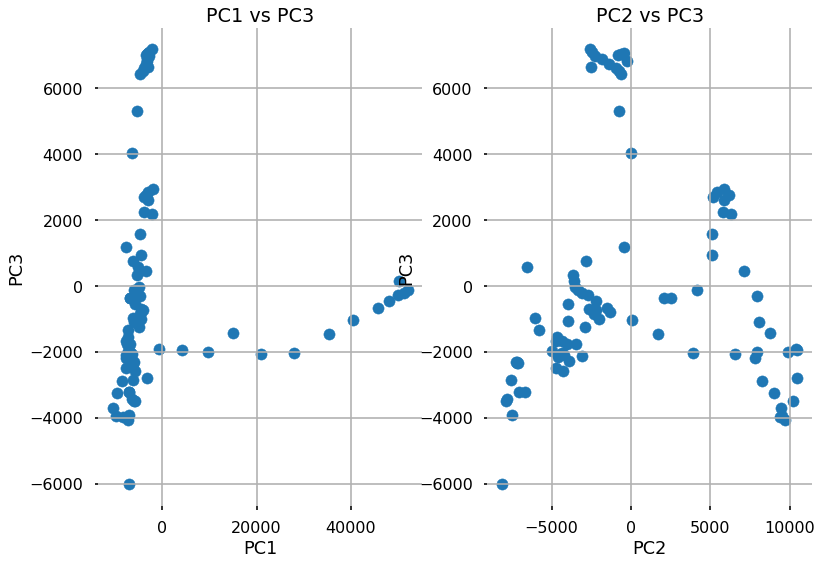

In [267]:
# drawing three componenets and comparing them with each other
pca = decomposition.PCA(n_components=3)
transformed = pca.fit_transform(images)
   
fig = plt.figure()
ax2 = fig.add_subplot(1,2,1)
ax3 = fig.add_subplot(1,2,2)

ax2.scatter(transformed[:,0],transformed[:,2])
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC3")
ax2.set_title('PC1 vs PC3')
ax2.grid(True)
ax2.set_frame_on(False)

ax3.scatter(transformed[:,1],transformed[:,2])
ax3.set_xlabel("PC2")
ax3.set_ylabel("PC3")
ax3.set_title('PC2 vs PC3')
ax3.grid(True)
ax3.set_frame_on(False)

4. In the code below, I pick a point far away from any known location and plot its reconstruction. 

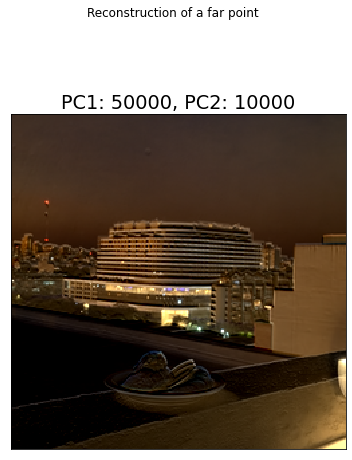

In [303]:
# working on two componenets
pca = decomposition.PCA(n_components=2)
transformed = pca.fit_transform(images)

# inversing and formatting the red point
far_point = [50000,10000]
inverse = pca.inverse_transform(far_point)
formatted = np.clip(inverse, 0, 255).astype(np.uint8) 

red_dot = Image.fromarray(formatted.reshape(250,250,3), 'RGB')

fig = plt.figure(figsize=(6, 8)) 
ax = fig.add_subplot(1,1,1, xticks=[], yticks=[]) 
ax.imshow(red_dot, interpolation='nearest')
ax.set_title(f'PC1: {far_point[0]}, PC2: {far_point[1]}')
plt.suptitle('Reconstruction of a far point')
plt.show()

## Optional extension



1. Using the first few PCA components, I trained a linear regression model to predict the time of day the photos were taken. I made screenshots from my timelapse from 2 pm till 7.30 pm within equal intervals, so I assumed that the time these pictures were taken was equally spaced. This assumption was made to use np.linspace while initializing the y variable. 


In [304]:
from scipy import optimize
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-poster')

# generate x and y
data1 = transformed[:,0]
x = [[i] for i in data1]

data2 = np.linspace(14, 19.5, num=94) # transforming time to 24 hour time system
y = [[i] for i in data2]

# Create a regressor 
reg = LinearRegression()
# Fit it to your data   
mdl = reg.fit(x, y)
# Exctract the R^2
scores = reg.score(x,y)

y_pred = reg.predict([[-5000]])

print(f"R^2: {scores}")
print(f"Intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")
print(f"Predicted time:{y_pred}")

R^2: 0.017638863588230302
Intercept: [16.75]
slope: [[-1.39281857e-05]]
Predicted time:[[16.81964093]]


2. Using the first few PCA components, I trained any of the classifiers we've used so far in class (using k-fold cross-validation) to predict whether the photo was taken in the first half of the images or the second half of the pictures.

In [302]:
import pandas
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

def import_data():

    # separate into independent and dependent variables
    x = [[i] for i in data1]
    y = [[i] for i in data2]

    return x, y

if __name__ == '__main__':
    # get training and testing sets
    x, y = import_data()

    # set to 10 folds
    skf = StratifiedKFold(n_splits=10)

    # blank lists to store predicted values and actual values
    predicted_y = []
    expected_y = []

    # partition data
    for train_index, test_index in skf.split(x, y):
        # specific ".loc" syntax for working with dataframes
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
        classifier = GaussianNB()
        classifier.fit(x_train, y_train)

        # store result from classification
        predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
        expected_y.extend(y_test)

    # save and print accuracy
    accuracy = metrics.accuracy_score(expected_y, predicted_y)
    print("Accuracy: " + accuracy.__str__())
    


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.